📊 Training R² Score: 0.35742435123061855
📊 Test R² Score: 0.03004606779622554
📊 Training MSE: 193.90684065089235
📊 Test MSE: 273.2626964349388


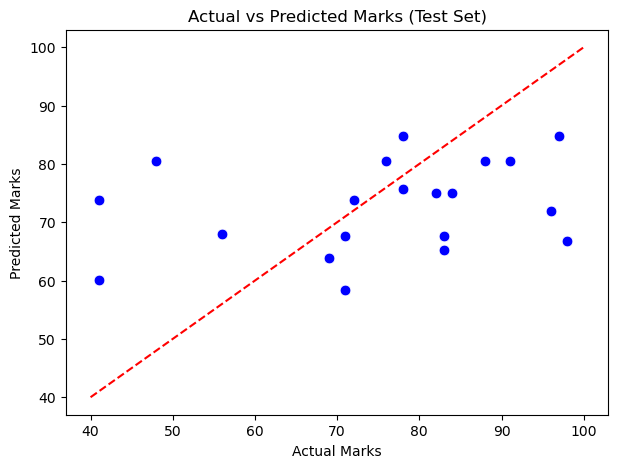

C:\Users\HP\AppData\Local\Temp\ipykernel_12580\855688541.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


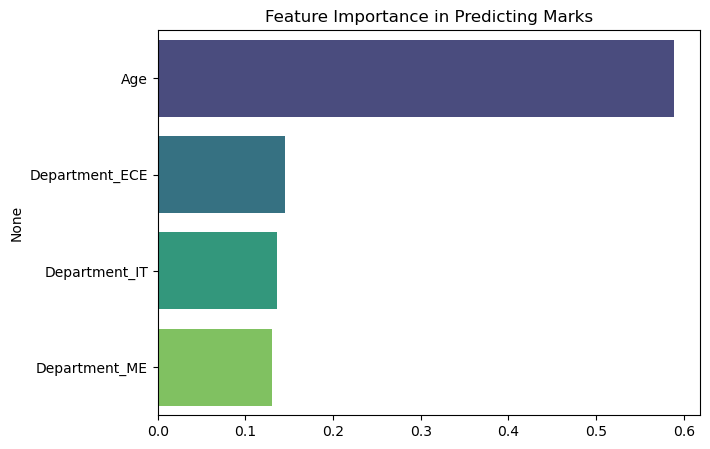

🎯 Predicted Marks for new student: 65.19433333333333


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# Step 1: Create Synthetic Data
# -----------------------------
np.random.seed(42)
n = 100
student_ids = range(1, n+1)
names = [f"Student_{i}" for i in student_ids]
ages = np.random.randint(18, 26, size=n)  # ages between 18–25
departments = np.random.choice(["CSE", "ECE", "ME", "IT"], size=n)
marks = np.random.randint(40, 100, size=n)  # marks 40–100

df = pd.DataFrame({
    "ID": student_ids,
    "Name": names,
    "Age": ages,
    "Department": departments,
    "Marks": marks
})

# Save dataset
df.to_csv("students.csv", index=False)
df.to_json("students.json", orient="records", indent=4)

# -----------------------------
# Step 2: Preprocessing
# -----------------------------
df_ml = pd.get_dummies(df, columns=["Department"], drop_first=True)

X = df_ml.drop(columns=["ID", "Name", "Marks"])
y = df_ml["Marks"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 3: Train Model
# -----------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Predictions & Metrics
# -----------------------------
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("📊 Training R² Score:", r2_train)
print("📊 Test R² Score:", r2_test)
print("📊 Training MSE:", mse_train)
print("📊 Test MSE:", mse_test)

# -----------------------------
# Step 5: Plots
# -----------------------------

# 1. Actual vs Predicted (Test set)
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", s=60)
plt.plot([40,100], [40,100], color="red", linestyle="--")  # reference line
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks (Test Set)")
plt.show()

# 2. Feature Importance
importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(7,5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.title("Feature Importance in Predicting Marks")
plt.show()

# -----------------------------
# Step 6: Predict New Student
# -----------------------------
new_student = pd.DataFrame({
    "Age": [22],
    "Department_ECE": [0],
    "Department_IT": [1],
    "Department_ME": [0]
})
predicted_marks = model.predict(new_student)
print("🎯 Predicted Marks for new student:", predicted_marks[0])


In [3]:
!pip install streamlit


In [4]:
# analysis.ipynb (add this to a new cell)

# --- Step 7: Student Clustering ---
from sklearn.cluster import KMeans

# Features for clustering
X_cluster = df[['Age', 'Marks']]

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Analyze the clusters
cluster_summary = df.groupby('Cluster')[['Age', 'Marks']].mean()
print("Cluster Summary:")
print(cluster_summary)

# --- Step 8: Export the final data for Next.js ---
# This is a crucial step for your dashboard!
import os
os.makedirs("next_dashboard/public", exist_ok=True)

# Export the entire DataFrame with the new 'Cluster' column
df.to_json("next_dashboard/public/students_with_clusters.json", orient="records", indent=4)

# You can also export the cluster summary
cluster_summary.to_json("next_dashboard/public/cluster_summary.json", orient="index", indent=4)

print("\n✅ Data exported for Next.js dashboard!")

Cluster Summary:
               Age      Marks
Cluster                      
0        21.125000  69.575000
1        21.594595  89.486486
2        22.434783  45.956522

✅ Data exported for Next.js dashboard!
